In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
amz_df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
amz_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [5]:
#Part 1: Analyzing Best-Seller Trends Across Product Categories
#Objective: Understand the relationship between product categories and their best-seller status.
#1.Crosstab Analysis:
#Create a crosstab between the product category and the isBestSeller status.

crosstab_result = pd.crosstab(amz_df['category'], amz_df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [28]:
proportions = crosstab_result[True] / (crosstab_result[True] + crosstab_result[False])
proportions.sort_values(ascending=False)

category
3D Printers                       0.004032
3D Printing & Scanning            0.000492
Abrasive & Finishing Products     0.020000
Action Cameras                    0.000589
Adapters                          0.011811
                                    ...   
Wind Instruments                  0.028000
Window Treatments                 0.020921
Women                             0.011985
Women's Sports & Outdoor Shoes    0.010209
eBook Readers & Accessories       0.000000
Length: 296, dtype: float64

In [6]:
#Are there categories where being a best-seller is more prevalent?  
#Women category is more prevalent by far

In [7]:
#2.Statistical Tests:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, expected_freq = chi2_contingency(crosstab_result)
chi2_statistic, chi2_p_value, expected_freq

(36540.20270061387,
 0.0,
 array([[2.47190130e+02, 8.09870149e-01],
        [4.05371878e+03, 1.32812173e+01],
        [2.49183599e+02, 8.16401360e-01],
        [1.69145827e+03, 5.54173243e+00],
        [2.53170536e+02, 8.29463782e-01],
        [8.50214439e+03, 2.78556144e+01],
        [1.06650580e+02, 3.49419782e-01],
        [2.57157474e+02, 8.42526204e-01],
        [9.51781673e+03, 3.11832664e+01],
        [1.50008526e+04, 4.91473619e+01],
        [9.32544700e+03, 3.05530045e+01],
        [2.38219520e+02, 7.80479700e-01],
        [3.22941944e+03, 1.05805616e+01],
        [9.44704859e+03, 3.09514084e+01],
        [6.68808779e+03, 2.19122125e+01],
        [5.26275760e+02, 1.72423967e+00],
        [1.90296531e+04, 6.23469391e+01],
        [2.77191835e+03, 9.08164873e+00],
        [2.53170536e+02, 8.29463782e-01],
        [4.04674164e+02, 1.32583581e+00],
        [1.92489346e+04, 6.30653723e+01],
        [3.10482764e+03, 1.01723609e+01],
        [2.04330551e+02, 6.69449115e-01],
        

In [8]:
pd.DataFrame(expected_freq, columns=amz_df['isBestSeller'].unique(), index=crosstab_result.index)

,False,True
category,,
3D Printers,247.190130,0.809870
3D Printing & Scanning,4053.718783,13.281217
Abrasive & Finishing Products,249.183599,0.816401
Action Cameras,1691.458268,5.541732
Adapters,253.170536,0.829464
...,...,...
Wind Instruments,249.183599,0.816401
Window Treatments,238.219520,0.780480
Women,17713.963660,58.036340


In [9]:
#Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association
association(crosstab_result, method="cramer")

0.1222829439760564

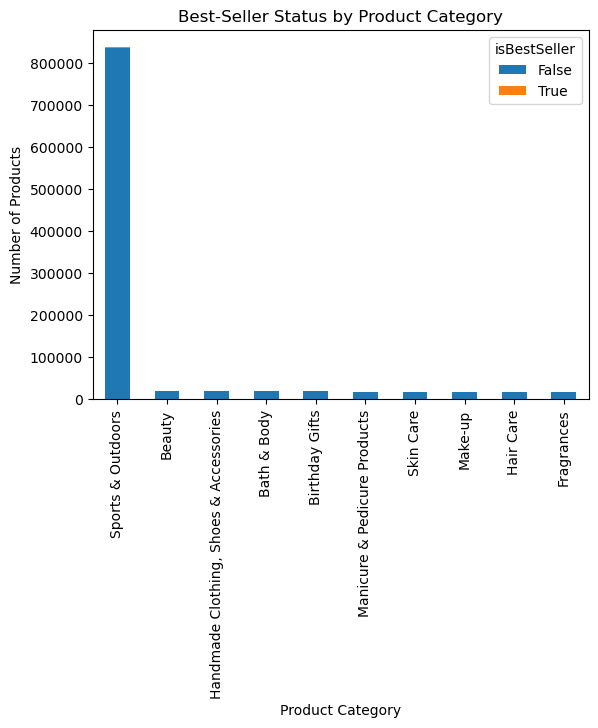

In [10]:
#3.Visualizations:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_result = pd.crosstab(amz_df["category"], amz_df["isBestSeller"])
top_categories = crosstab_result.sum(axis=1).sort_values(ascending=False).head(10).index
filtered = crosstab_result.loc[top_categories]
filtered.plot(kind="bar", stacked=True)
plt.title("Best-Seller Status by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Products")
plt.legend(title="isBestSeller")
plt.show()

In [11]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands
#Objective: Investigate how different product categories influence product prices.
#0.Preliminary Step: Remove outliers in product prices.
#For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Q1 = amz_df['price'].quantile(0.25)
Q3 = amz_df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_wisker = Q1 - 1.5 * IQR
upper_wisker = Q3 + 1.5 * IQR

amz_df_no_outliers = amz_df[(amz_df['price'] >= lower_wisker) & (amz_df['price'] <= upper_wisker)]
print("Original shape:", amz_df.shape)
print("After removing outliers:", amz_df_no_outliers.shape)

Original shape: (2443651, 9)
After removing outliers: (2115963, 9)


C:\Users\Brenda Villaverde\AppData\Local\Temp\ipykernel_20184\3185468833.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='category', y='price', palette="coolwarm", legend=False);


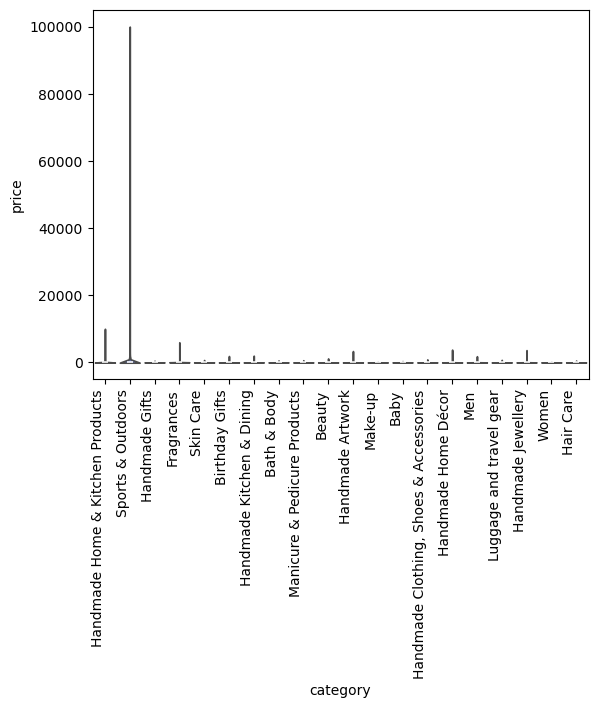

In [12]:
#1.Violin Plots:
#Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
#Which product category tends to have the highest median price? Don't filter here by top categories.
top_20_categories = amz_df['category'].value_counts().head(20).index

# Filter the DataFrame to only include these categories
filtered_df = amz_df[amz_df['category'].isin(top_20_categories)]

sns.violinplot(data=filtered_df, x='category', y='price', palette="coolwarm", legend=False);
plt.xticks(rotation=90, ha='right')
plt.show()

In [13]:
#Which product category tends to have the highest median price? Don't filter here by top categories.
#Sports and Outdoors

C:\Users\Brenda Villaverde\AppData\Local\Temp\ipykernel_20184\186243162.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="coolwarm");


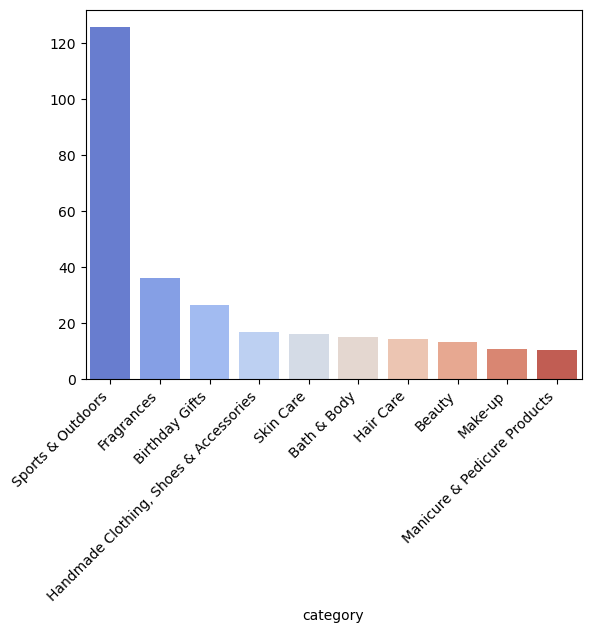

In [14]:
#2.Bar Charts:
#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

top_10_categories = amz_df['category'].value_counts().head(10).index
top_df = amz_df[amz_df['category'].isin(top_10_categories)]

avg_prices = top_df.groupby('category')['price'].mean().sort_values(ascending=False)

sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="coolwarm");
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
#Which product category commands the highest average price? Don't filter here by top categories.
#Sports & Outdoors

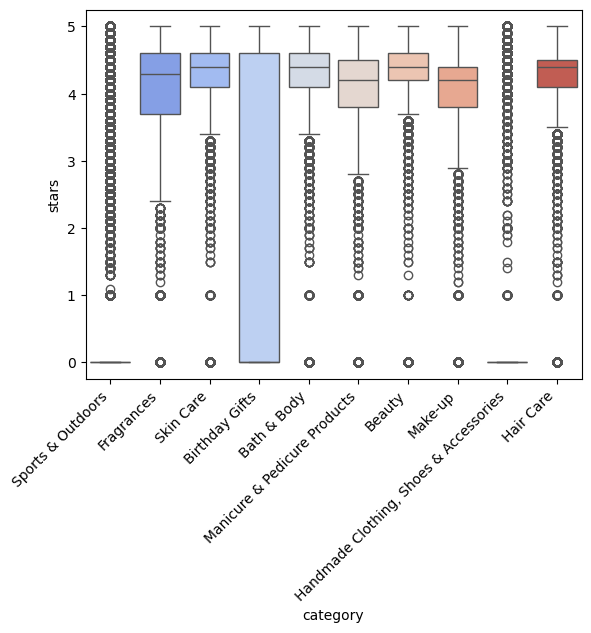

In [21]:
#3.Box Plots:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

top_10_categories = amz_df['category'].value_counts().head(10).index
filtered_df = amz_df[amz_df['category'].isin(top_10_categories)].dropna(subset=['stars'])
sns.boxplot(data=filtered_df, x='category', y='stars', palette="coolwarm", hue='category', legend=False);
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
#Part 3: Investigating the Interplay Between Product Prices and Ratings
#Objective: Analyze how product ratings (stars) correlate with product prices.
#1.Correlation Coefficients:
#Calculate the correlation coefficient between price and stars.
#Is there a significant correlation between product price and its rating? 
#Spearman method
correlation = amz_df['price'].corr(amz_df['stars'], method='spearman')
correlation

-0.1331642546243379

In [23]:
#Pearson method
correlation = amz_df['price'].corr(amz_df['stars'])
correlation

-0.1249067326214861

In [ ]:
#Is there a significant correlation between product price and its rating? 
#A value close to -1 implies a strong negative correlation.

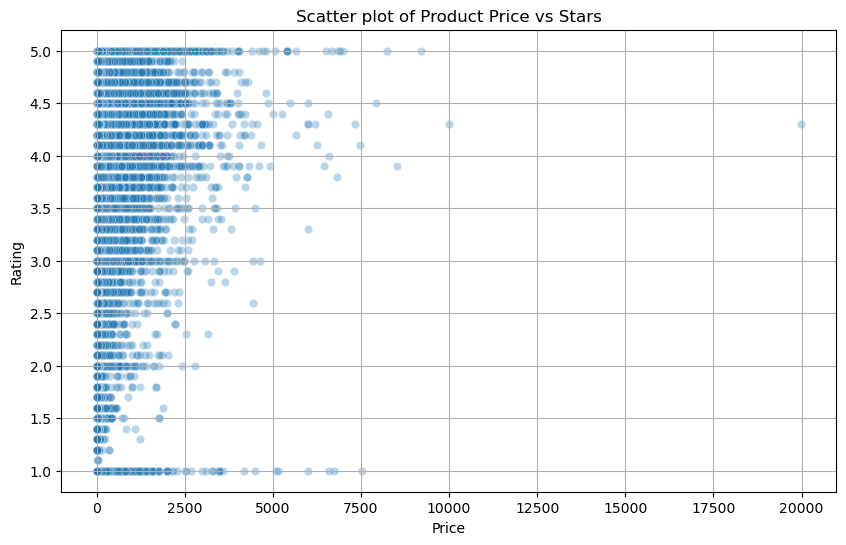

In [24]:
#2.Visualizations:
#Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
relation_df = amz_df[(amz_df['stars'] > 0) & (amz_df['price'] > 0)]

plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='stars', data=relation_df, alpha=0.3)

plt.title('Scatter plot of Product Price vs Stars')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

#Examine if product prices typically follow a normal distribution using a QQ plot.

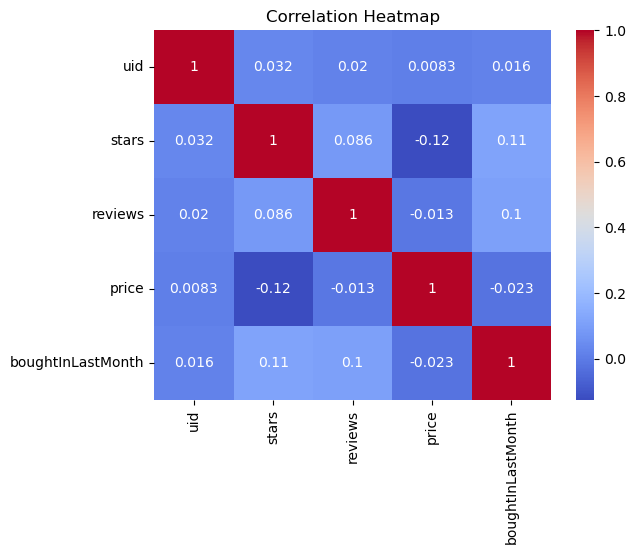

In [99]:
#Use a correlation heatmap to visualize correlations between all numerical variables.
numeric_var = amz_df.select_dtypes(include=['number']).columns

correlation_matrix = amz_df[numeric_var].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

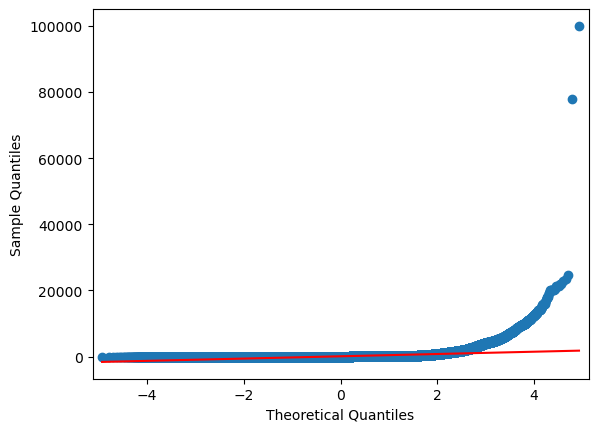

In [26]:
#Examine if product prices typically follow a normal distribution using a QQ plot.
import statsmodels.api as sm
sm.qqplot(amz_df['price'], line='s');
plt.show()